In [14]:
"""
Python script to create stackplot of drought monitors for any given range of years.

To use, change the file location, name of the plot, and year range
"""
#Created by Peter Storm (pqs4@cornell.edu)
#Assisted by Parker Rice (ricep@okstate.edu)
#August 10, 2018


'\nPython script to create stackplot of drought monitors for any given range of years.\n\nTo use, change the file location, name of the plot, and year range\n'

In [40]:
###User Inputs###
#read in file with csv data
#downloaded from: http://droughtmonitor.unl.edu/Data/DataDownload/ComprehensiveStatistics.aspx
#Need to get 'percent area' for the statistics category, and 'categorical' statistics type in a csv output
file_loc = 'dm_export_20000101_20180101.csv'

#range of years for data to graph, must be in CSV file
year_start = 2000
year_end = 2016    #shows through end of year, e.g. 2008 shows to include 2009 start

#plot title
plot_title = 'Kern County (CA) Drought Indicator'.format(year_start, year_end)

In [8]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# import csv to pandas dataframe
df = pd.read_csv(file_loc)

In [15]:
#Data Handling

#turn data from dataframe into individual lists
time_series = df['ValidStart'].tolist()
No = df['None'].tolist()
D0 = df['D0'].tolist()
D1 = df['D1'].tolist()
D2 = df['D2'].tolist()
D3 = df['D3'].tolist()
D4 = df['D4'].tolist()

#normalize data to % of total
for i in range(len(D0)):
    total_i = float(No[i]) + float(D0[i]) + float(D1[i]) + float(D2[i]) + float(D3[i]) + float(D4[i])
    No[i] = float(No[i]) / total_i
    D0[i] = float(D0[i]) / total_i
    D1[i] = float(D1[i]) / total_i
    D2[i] = float(D2[i]) / total_i
    D3[i] = float(D3[i]) / total_i
    D4[i] = float(D4[i]) / total_i

#reverse order of lists to properly plot from start of time to end
#plotted data is plotted sequentially, not based on datetime stamp
No.reverse()
D0.reverse()
D1.reverse()
D2.reverse()
D3.reverse()
D4.reverse()
time_series.reverse()
df_inputs = [No, D0, D1, D2, D3, D4]
df_inputs.reverse()

In [16]:
#Set up the range of years from the data
year_range = range(year_start, year_end + 1, 1)
year_range = [str(x) for x in year_range]

#indexes for start and end within the time_series list for each year
start_year_index = []
end_year_index = []

for j in year_range:
    count_index = []
    for i in range(len(time_series)):
        if j in time_series[i]:
            count_index.append(i)
    end_year_index.append(max(count_index))
    start_year_index.append(min(count_index))


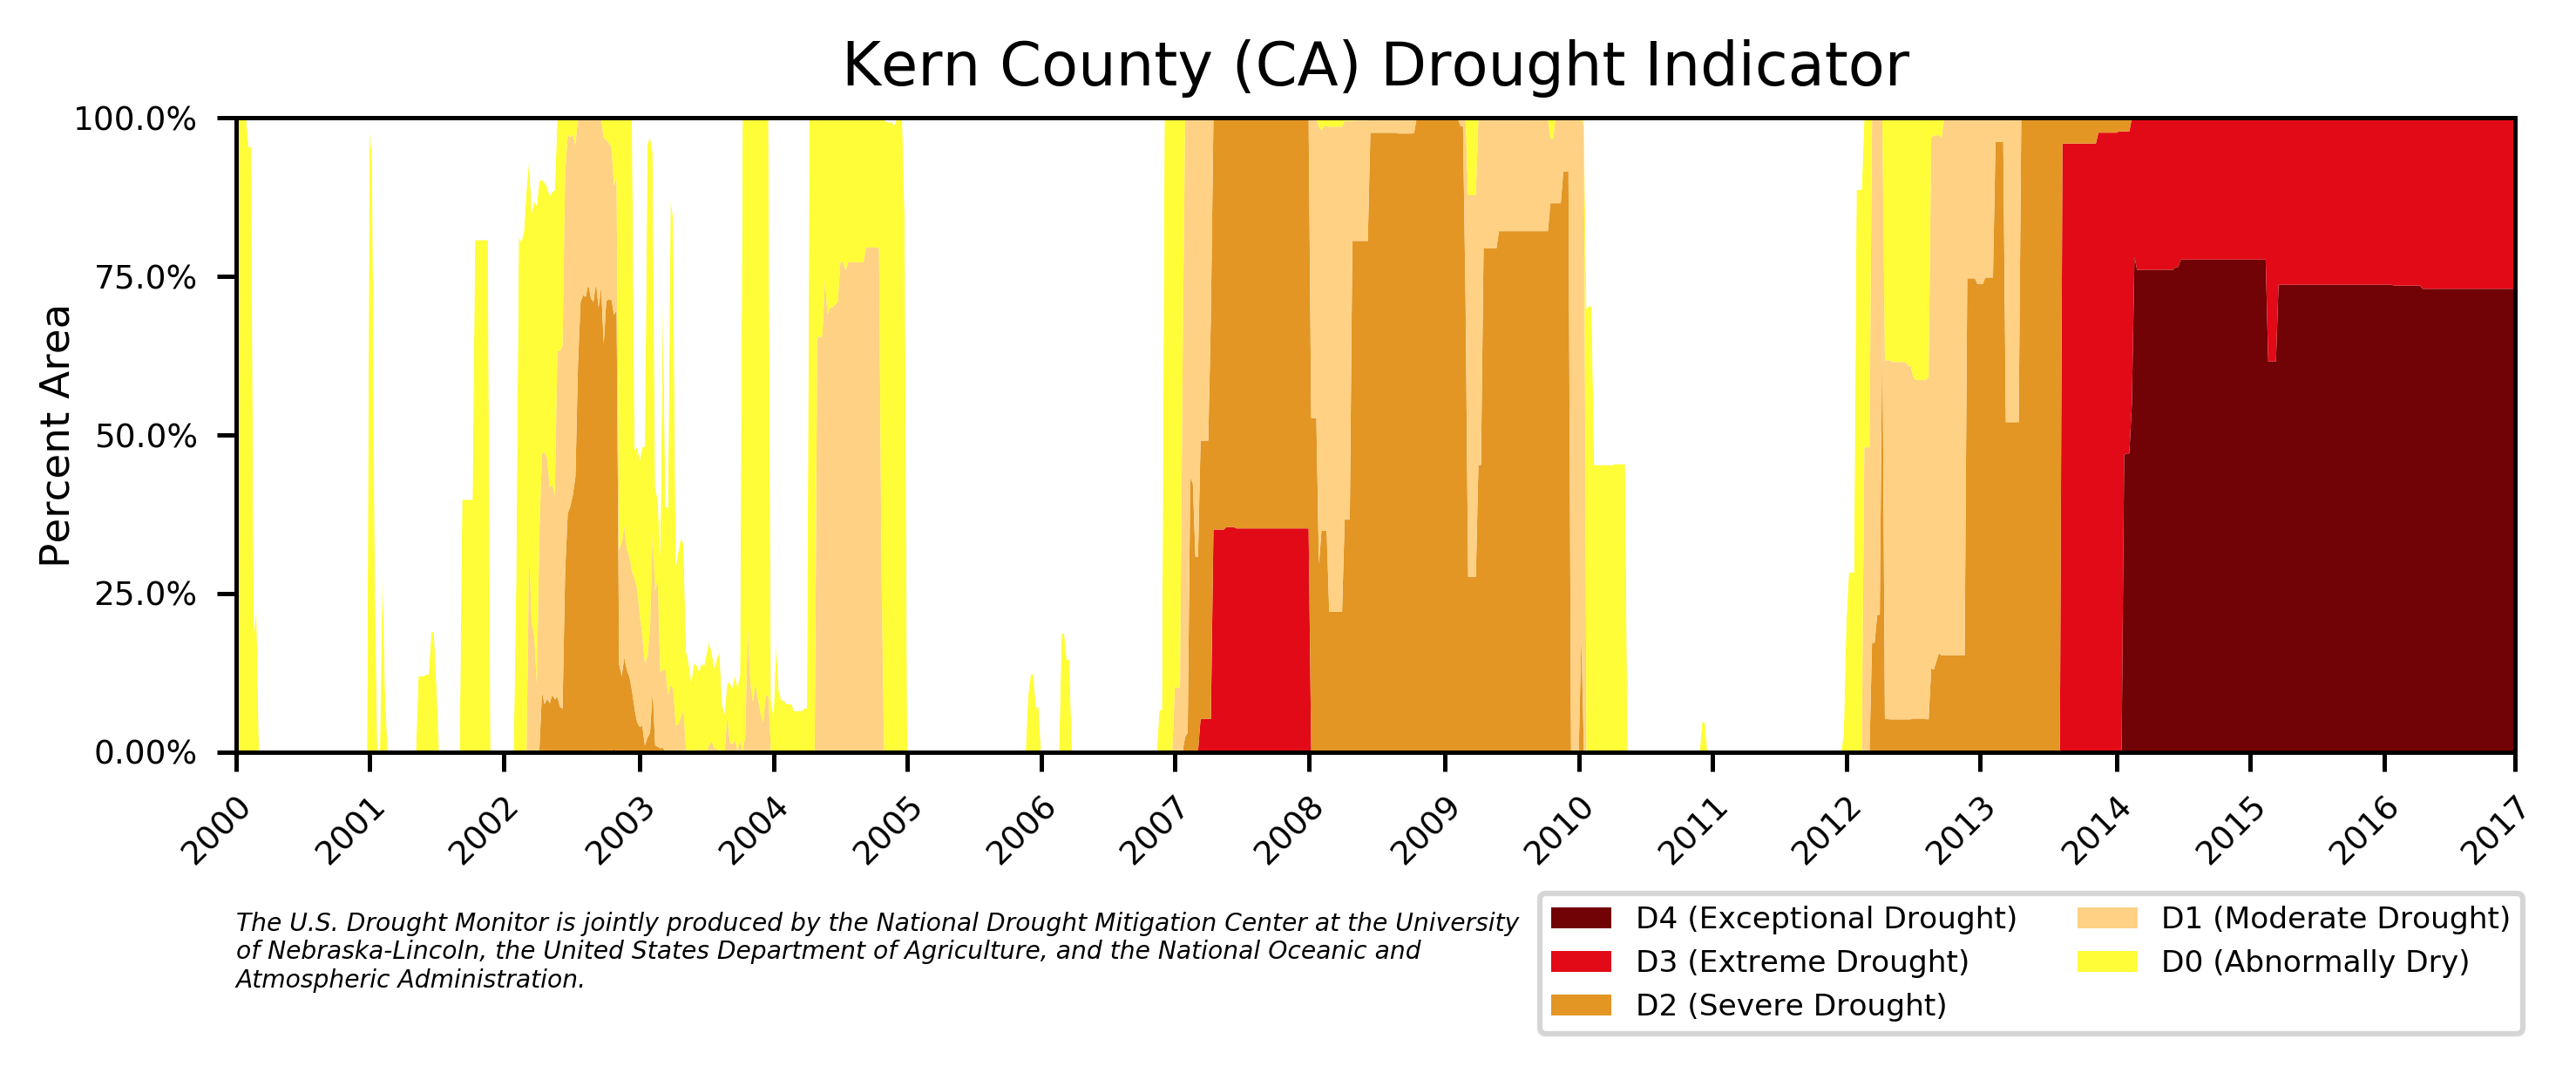

In [53]:
#Figure Creation
#Plot Global Settings
my_dpi = 450   #set resolution of the saved images
w = 7.5    #height in inches
h=2.14    #width in inches

#additional breaks can be modified below in this area for the added text at the bottom. Simply add lines  
#without additional text (e.g. '/n') to start a next line
credit_text = """The U.S. Drought Monitor is jointly produced by the National Drought Mitigation Center at the University
of Nebraska-Lincoln, the United States Department of Agriculture, and the National Oceanic and 
Atmospheric Administration."""


#label for the plot
label = ['D4 (Exceptional Drought)','D3 (Extreme Drought)','D2 (Severe Drought)',
         'D1 (Moderate Drought)','D0 (Abnormally Dry)']

#create color palate for the plot, taken from dought monitor
pal = ['#FFFFFF', '#FFFD38','#FED184','#E39624','#E20A17','#710206']
pal.reverse()    #reverse order to math above lists

#initialize figure and axes
fig = plt.figure(figsize = (w,h), dpi=my_dpi)
ax = plt.axes(frameon=True)

#create plot
plt.stackplot(time_series, df_inputs, labels=label, colors = pal, baseline = 'zero')


#set up the time axis ticks to occur at the start of every year, add one for the last year
ax.set_xticks([*start_year_index, end_year_index[-1]])
#label the x axis
ax.set_xticklabels([*year_range, str(year_end + 1)], rotation = 45, rotation_mode='anchor',
                   horizontalalignment="right", verticalalignment='top', size=6)

#sets y-axis tick locations
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
#labels the y-axis ticks
ax.set_yticklabels(['0.00%', '25.0%', '50.0%', '75.0%', '100.0%'], horizontalalignment="right")
#sets size of y-axis and make y-axim major
ax.tick_params(axis='y', which='major', labelsize=6)
#set bounds of axes
ax.set_xlim(time_series[start_year_index[0]], time_series[end_year_index[-1]])
ax.set_ylim(0,1)

#add elements of plot
plt.legend(bbox_to_anchor=(1.01,-.2), loc="upper right", fontsize=5.5, ncol=2)
plt.title(plot_title, size=11, loc='center')
#modify credit_text above to adjust the new lines
plt.annotate(credit_text, (0, -.08), (0, -20), xycoords='axes fraction', 
             textcoords='offset points', va='top', size=4.5, style='italic')
plt.ylabel('Percent Area', fontsize=7.5, labelpad=-1)


for year in year_range:
    
    #set start/end indexes for the rectangles to be drawn
    year_num = int(year) - year_start
    start_x = start_year_index[year_num] + 3    #3 is added to make the rectancle look nicer
    end_x = end_year_index[year_num]

    # Create a Rectangle patches, add them
    #rectangles created by adding 4 lines
    linewidth = 2
    lcol = 'b'
    rect1 = patches.ConnectionPatch((start_x,0.005),(end_x,0.005),"data", linewidth=linewidth, edgecolor=lcol)
    ax.add_patch(rect1)

    rect2 = patches.ConnectionPatch((start_x,0.995),(end_x,0.995),"data", linewidth=linewidth, edgecolor=lcol)
    ax.add_patch(rect2)

    rect3 = patches.ConnectionPatch((start_x,0.995),(start_x,0.005),"data", linewidth=linewidth, edgecolor=lcol)
    ax.add_patch(rect3)

    rect4 = patches.ConnectionPatch((end_x,0.995),(end_x,0.005),"data", linewidth=linewidth, edgecolor=lcol)
    ax.add_patch(rect4)

    
    #export figure--uncomment to plt.savefig() to save and comment plt.show(), otherwise keep as is
    plt.savefig('kern_drought_' + str(year_num), bbox_inches="tight")
#     plt.show()
    
    #remove the drawn rectangles for next loop
    rect1.remove()
    rect2.remove()
    rect3.remove()
    rect4.remove()
